In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math 

In [23]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation

        self.energy = self.count_proteins_contacts()
        
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH."""
        hh=0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
        return -(hh//2)

In [24]:
template = [1,1,0]

In [25]:
length = 10
seq_start_10 = []
for i in range(length):
    seq_start_10.append(template[i%len(template)])
    
start_conformation = [(0, 0)]
for i in range(1,length):
    if (i%8>0 and i%8<4):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]+1)
    elif (i%8>4 and i%8<=7):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]-1)
    else:
        new_coordinate = (start_conformation[-1][0]+1,start_conformation[-1][1])
    start_conformation.append(new_coordinate)

(-1, 14)

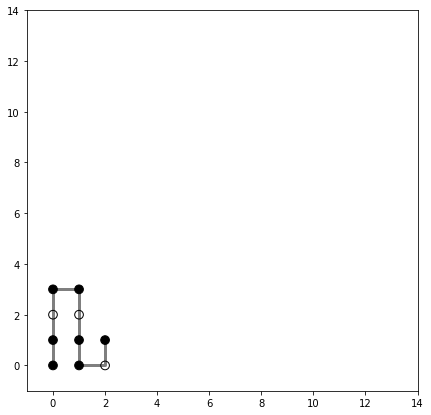

In [26]:
xplot = []
yplot = []
for i in start_conformation:
    xplot.append(i[0])
    yplot.append(i[1])
#markers = list(matplotlib.lines.Line2D.markers)

plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=seq_start_10, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

In [27]:
p = Protein(seq_start_10, start_conformation)
start_e = p.count_proteins_contacts()
print(p.energy)

-3


### Текущий алгоритм.

1. Случайно из равномерного распределения выбирается одно действие: удалить выбранный элемент или увеличить цепочку на один мономер.



In [28]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]

In [102]:
def M_C(p, template, t, f, nsteps = 100):
    
    E = 0.0
    for i in range(nsteps):

        w = random.uniform(0, 1)
        if(w<0.5): #удаляем в конце 
            if(len(p.sequence)!=1): 
                new_e = Protein(p.sequence[:-1],p.conformation[:-1]).count_proteins_contacts()
                p_metropolis = min(1.0, math.exp(-(new_e-p.energy+f)/t)/2.0 )
                change_accept = random.uniform(0, 1)
                if(change_accept < p_metropolis):
                    p.sequence = p.sequence[:-1]
                    p.conformation = p.conformation[:-1]
                    p.energy = new_e
        else:
            moves_all = []  
            for step in steps:
                point = (p.conformation[-1][0]+step[0], p.conformation[-1][1]+step[1])
                if(point not in p.conformation):
                    moves_all.append(point)   
                    
            if(len(moves_all)!=0):
                sequence_longer = p.sequence.copy()
                sequence_longer.append(template[(len(p.sequence))%len(template)])
                new_point = random.choice(moves_all)
                #print(p.conformation)
                new_conf = p.conformation.copy()
                new_conf.append(new_point)
                #print(new_conf)
                new_e = Protein(sequence_longer,new_conf).count_proteins_contacts()
                p_metropolis = min(1.0, math.exp(-(new_e-p.energy-f)/t)/(2.0*len(moves_all)) )
                change_accept = random.uniform(0, 1)
                if(change_accept < p_metropolis):
                    p.sequence = sequence_longer
                    p.conformation = new_conf
                    p.energy = new_e
                
        E = E + math.exp(-(p.energy-f*len(p.sequence)))

 
    return E/nsteps

In [104]:

some_results = np.zeros(100)
for i in range(len(some_results)):
    p = Protein(seq_start_10, start_conformation)
    some_results[i] = M_C(p, template, 0.2, 0.2,1000)
    print(i, end = " ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

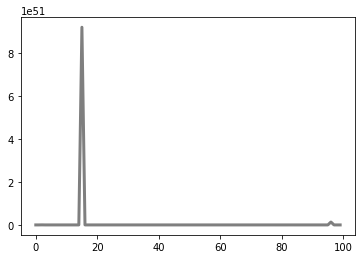

In [105]:
plt.plot([i for i in range(len(some_results))], some_results, '-', color = 'k', lw=3,markersize=9,alpha=0.5)


In [100]:
#просто просмотр результатов одного запуска 

p = Protein(seq_start_10, start_conformation)
M_C(p, template, 0.2, 0.2,1000)

2187588673613.3984

(-1, 14)

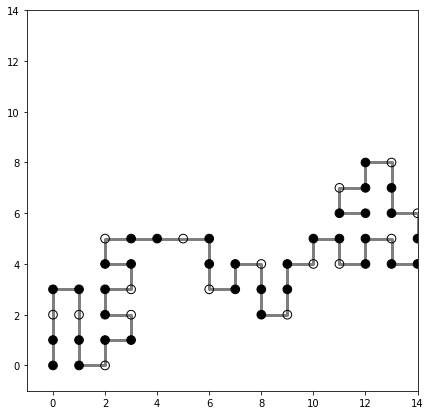

In [101]:
xplot = []
yplot = []
for i in p.conformation:
    xplot.append(i[0])
    yplot.append(i[1])
#markers = list(matplotlib.lines.Line2D.markers)

plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=p.sequence, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)